## Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from champ import Field
from polarizer import Polarizer
from mirror import Mirror
from masque import Mask
from pupille import Pupil
from detecteur import Detector
from propagator import Propagator

## Set the simulation parameters

In [21]:
# CREATE A FLAT TITLTED FIELD WITH ARBITRARY TIP AND TILT
f = Field(256, wavelength=632.8e-9,
          field_map='plan_wave',
          incidence_angles=[.51, .255])

# CREATE A PUPIL MASK
pup = Pupil(256, diameter=32)

# CREATE A LINEAR POLARIZER PARALLEL TO THE HORIZONTAL AXIS
p_linear = Polarizer('linear', angle=0)
# CREATE A BIREFRIGENT MATERIAL POLARIZER WITH FAST AXIS ORIENTED AT PI/4 AND A
# PI/2 PHASE RETARDATION (TO TRANSFORM AN HORIZONTAL POLARIZATION TO A
# LEFT-HANDED CIRCULAR POLARIZATION)
p_retarder = Polarizer('retarder', angle=-np.pi/4, phase_retardation=np.pi/2)

# CREATE A MIRROR
mirror = Mirror(reflectance=1,
                angle=np.pi/3)

# CREATE A DETECTOR
cam = Detector(256,
               display_intensity=False)

## Propagate using Fourier operators > and <

[0, <champ.Field object at 0x7fcdff024d90>, array([[[-0.86248956+0.50607486j],
        [-0.99978726+0.02062628j],
        [-0.88262811-0.47007192j],
        ...,
        [ 0.95356831-0.30117682j],
        [ 0.97924918+0.20265994j],
        [ 0.75570037+0.65491751j]],

       [[-0.96225455+0.27215103j],
        [-0.97266031-0.23223245j],
        [-0.73551335-0.67751023j],
        ...,
        [ 0.99870352-0.05090453j],
        [ 0.89646345+0.44311769j],
        [ 0.56606357+0.82436159j]],

       [[-0.99978726+0.02062628j],
        [-0.88262811-0.47007192j],
        [-0.54083042-0.84113165j],
        ...,
        [ 0.97924918+0.20265994j],
        [ 0.75570037+0.65491751j],
        [ 0.33981752+0.94049139j]],

       ...,

       [[-0.40618672-0.9137901j ],
        [ 0.0915943 -0.99579641j],
        [ 0.56606357-0.82436159j],
        ...,
        [ 0.19236926+0.98132261j],
        [-0.31117015+0.95035422j],
        [-0.73551335+0.67751023j]],

       [[-0.16255262-0.98669988j],
        

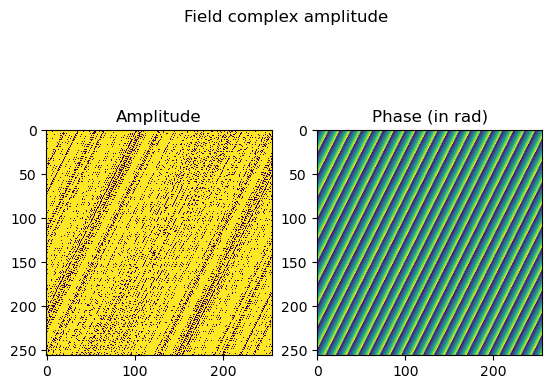

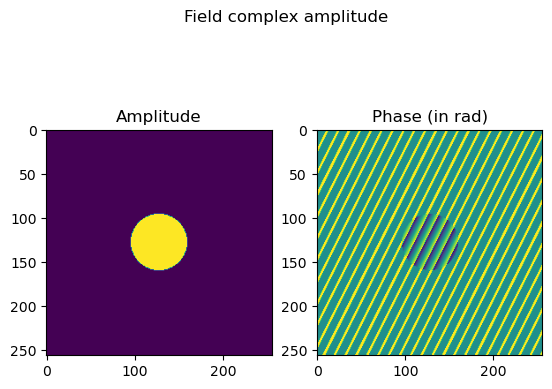

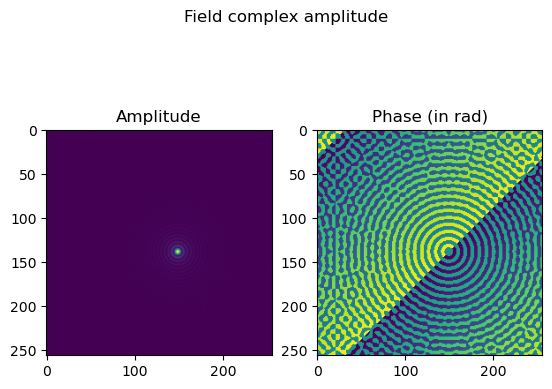

In [22]:
# MAKE FOURIER PROPAGATION WITH > AND INVERSE FOURIER PROPAGATION WITH < FROM
# PLAN TO PLAN
(((((f * pup) > p_linear) < mirror) * p_retarder) > mirror) * cam

# PRINT THE PATH FOLLOWED BY THE LIGHT
print('\n'.join(map(str, f.optical_path)))

# PRINT FIELD AND POLARIZATION :
# 0 = ENTRANCE FIELD
# 1 = FIELD AFTER PUPIL
# 2 = FIELD AFTER FOURIER TRANSFORM
# 3 = FIELD AFTER LINEAR POLARIZER
# 4 = FIELD BEFORE MIRROR AFTER FOURIER TRANSFORM
# 5 = FIELD AFTER MIRROR
# 6 = FIELD AFTER BIREFRINGENT PLATE
# 7 = FIELD AFTER FOURIER TRASNFORM
# 8 = FIELD AFTER MIRROR
# 9 = FIELD AT CAMERA
BoolPlot = True
Plan2Plot = (0, 1, 2)
if BoolPlot is True:
    for i in Plan2Plot:
        (f@i).disp_complex_amplitude()

## Repeat the same operations with the Propagator object

[0, <champ.Field object at 0x7fcdff96a7c0>, array([[[-0.+0.j],
        [-0.+0.j],
        [ 0.-0.j],
        ...,
        [ 0.+0.j],
        [ 0.+0.j],
        [ 0.+0.j]],

       [[-0.+0.j],
        [ 0.-0.j],
        [ 0.-0.j],
        ...,
        [ 0.+0.j],
        [ 0.+0.j],
        [ 0.+0.j]],

       [[-0.+0.j],
        [ 0.-0.j],
        [ 0.-0.j],
        ...,
        [ 0.+0.j],
        [ 0.+0.j],
        [ 0.+0.j]],

       ...,

       [[ 0.-0.j],
        [ 0.+0.j],
        [ 0.+0.j],
        ...,
        [ 0.+0.j],
        [-0.+0.j],
        [-0.+0.j]],

       [[ 0.-0.j],
        [ 0.+0.j],
        [ 0.+0.j],
        ...,
        [-0.+0.j],
        [-0.+0.j],
        [-0.+0.j]],

       [[ 0.+0.j],
        [ 0.+0.j],
        [ 0.+0.j],
        ...,
        [-0.+0.j],
        [-0.+0.j],
        [-0.+0.j]]])]
[1, <pupille.Pupil object at 0x7fce00acecd0>, array([[[-0.+0.j],
        [-0.+0.j],
        [ 0.-0.j],
        ...,
        [ 0.+0.j],
        [ 0.+0.j],
        [ 0.+0

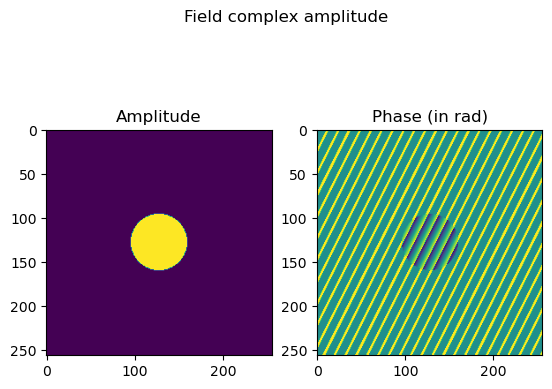

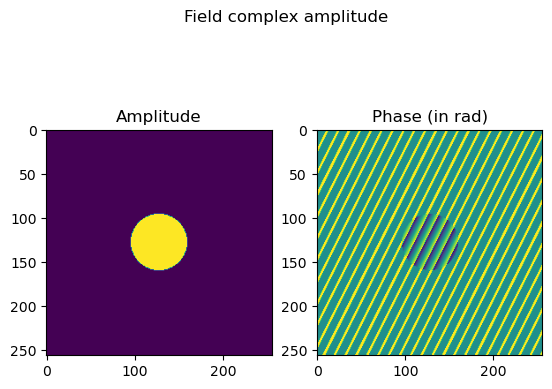

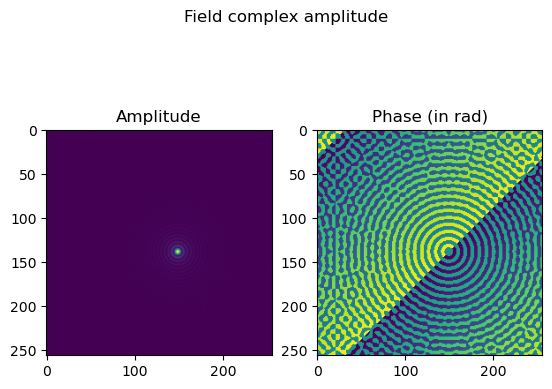

In [18]:
# PROPAGATE VIA THE PROPAGATOR OBJECT
FFT = Propagator('FFT', f)
IFFT = Propagator('IFFT', f)

f = f@0
(((((((f * pup) * FFT) * p_linear * IFFT) * mirror) * p_retarder) * FFT) *
 mirror) * cam
# PRINT THE PATH FOLLOWED BY THE LIGHT
print('\n'.join(map(str, f.optical_path)))

# PRINT FIELD AND POLARIZATION AT POSITIONS 0 (ENTRANCE FIELD),
# 1 (FIELD AFTER PUPIL), 2 (FIELD AFTER FOURIER TRANSFORM),
# 4 (FIELD BEFORE MIRROR), 5 (FIELD AFTER MIRROR), 6 (FIELD AFTER BIREFRINGENT
# PLATE)
BoolPlot = True
if BoolPlot is True:
    for i in Plan2Plot:
        (f@i).disp_complex_amplitude()

[1,
 array([[[-0.+0.j],
         [-0.+0.j],
         [ 0.-0.j],
         ...,
         [ 0.+0.j],
         [ 0.+0.j],
         [ 0.+0.j]],
 
        [[-0.+0.j],
         [ 0.-0.j],
         [ 0.-0.j],
         ...,
         [ 0.+0.j],
         [ 0.+0.j],
         [ 0.+0.j]],
 
        [[-0.+0.j],
         [ 0.-0.j],
         [ 0.-0.j],
         ...,
         [ 0.+0.j],
         [ 0.+0.j],
         [ 0.+0.j]],
 
        ...,
 
        [[ 0.-0.j],
         [ 0.+0.j],
         [ 0.+0.j],
         ...,
         [ 0.+0.j],
         [-0.+0.j],
         [-0.+0.j]],
 
        [[ 0.-0.j],
         [ 0.+0.j],
         [ 0.+0.j],
         ...,
         [-0.+0.j],
         [-0.+0.j],
         [-0.+0.j]],
 
        [[ 0.+0.j],
         [ 0.+0.j],
         [ 0.+0.j],
         ...,
         [-0.+0.j],
         [-0.+0.j],
         [-0.+0.j]]])]